# Pengenalan Jaringan Saraf dalam Pengolahan Gambar

Dalam contoh sebelumnya, Anda melihat bagaimana Anda dapat membuat jaringan saraf yang disebut **jaringan saraf dalam** untuk mencocokkan pola dari sekumpulan gambar barang fashion dengan label. Dalam waktu singkat, Anda dapat melatihnya untuk mengklasifikasikan dengan akurasi yang cukup tinggi pada set pelatihan, meskipun sedikit lebih rendah pada set pengujian.

## Memahami Ruang yang Terbuang

Salah satu hal yang mungkin Anda perhatikan saat melihat gambar adalah bahwa terdapat banyak **ruang yang terbuang** di setiap gambar. Meskipun hanya ada 784 piksel, akan menarik untuk mengetahui apakah ada cara untuk meringkas gambar menjadi fitur-fitur penting yang membedakan antara sepatu, tas tangan, atau kemeja. 

### Konvolusi

Di sinilah **konvolusi** berperan. Apa itu konvolusi? Jika Anda pernah melakukan pengolahan gambar, biasanya itu melibatkan penggunaan **filter** dan menerapkannya pada gambar untuk mengubah gambar yang mendasarinya. Proses ini berjalan seperti berikut:

1. **Ambil nilai piksel** dan nilai tetangganya.
2. Jika filter kita berukuran **3 x 3**, maka kita dapat melihat tetangga terdekat dalam grid 3 x 3.
3. Untuk mendapatkan nilai baru untuk piksel, kalikan setiap tetangga dengan nilai yang sesuai dalam filter.

### Contoh Konvolusi

Sebagai contoh, jika piksel kita memiliki nilai **192** dan tetangga kiri atasnya bernilai **0**, dengan nilai filter kiri atas adalah **-1**, maka kita mengalikan **0** dengan **-1**. Lanjutkan dengan cara yang sama untuk tetangga atasnya yang bernilai **64**, dengan nilai filter yang sesuai adalah **0**. 

Ulangi ini untuk setiap tetangga dan setiap nilai filter yang sesuai. Piksel baru kemudian menjadi jumlah dari setiap nilai tetangga yang dikalikan dengan nilai filter mereka yang sesuai. Itulah yang dimaksud dengan **konvolusi**. Sesederhana itu.

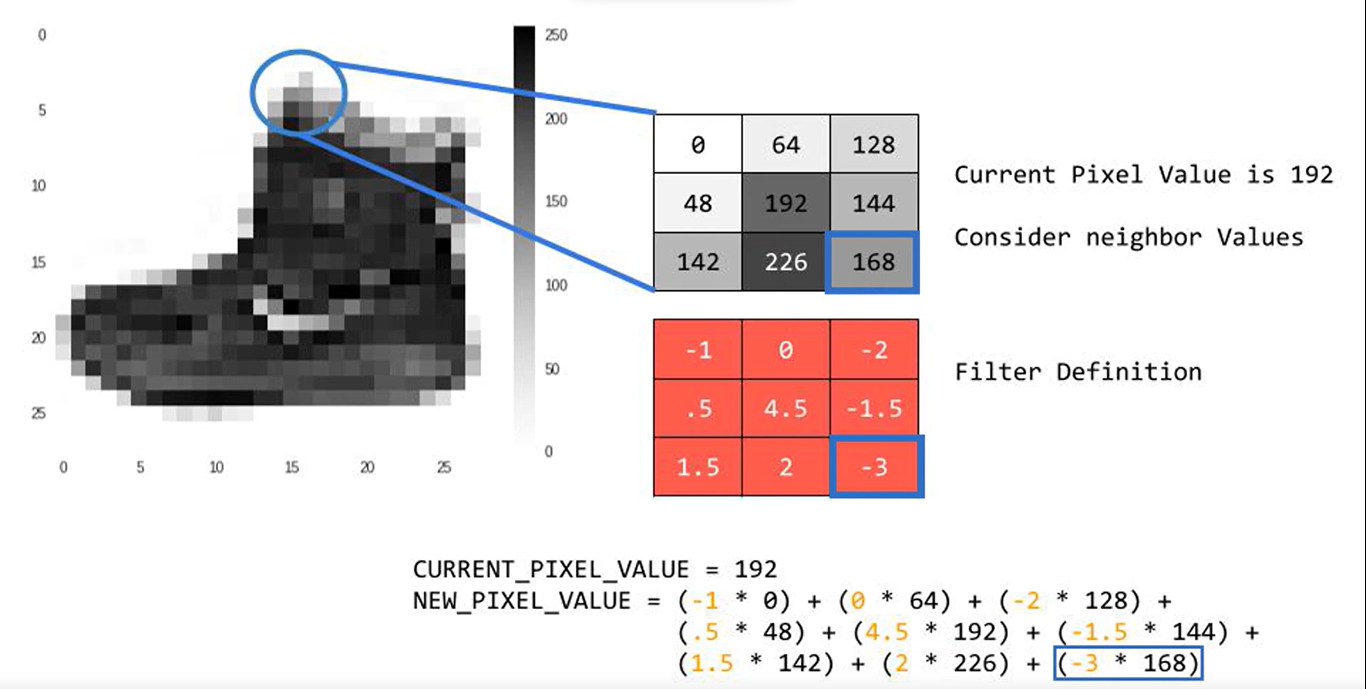

### Mengedepankan Fitur

Ide di sini adalah bahwa beberapa konvolusi akan mengubah gambar sedemikian rupa sehingga fitur tertentu dalam gambar menjadi lebih jelas. Misalnya, dengan filter tertentu, garis vertikal dalam gambar akan terlihat lebih menonjol, sementara dengan filter lainnya, garis horizontal yang akan lebih terlihat.

## Pengolahan Lebih Lanjut: Pooling

Ini adalah pengantar dasar tentang apa yang dilakukan konvolusi. Ketika digabungkan dengan sesuatu yang disebut **pooling**, mereka bisa menjadi sangat kuat. 

### Apa Itu Pooling?

Sederhananya, pooling adalah cara untuk **mengompresi gambar**. Cara yang cepat dan mudah untuk melakukannya adalah dengan melintasi gambar empat piksel sekaligus, yaitu piksel saat ini dan tetangga di bawah serta di sebelah kanan. Dari empat piksel ini, pilih nilai terbesar dan simpan hanya nilai itu.

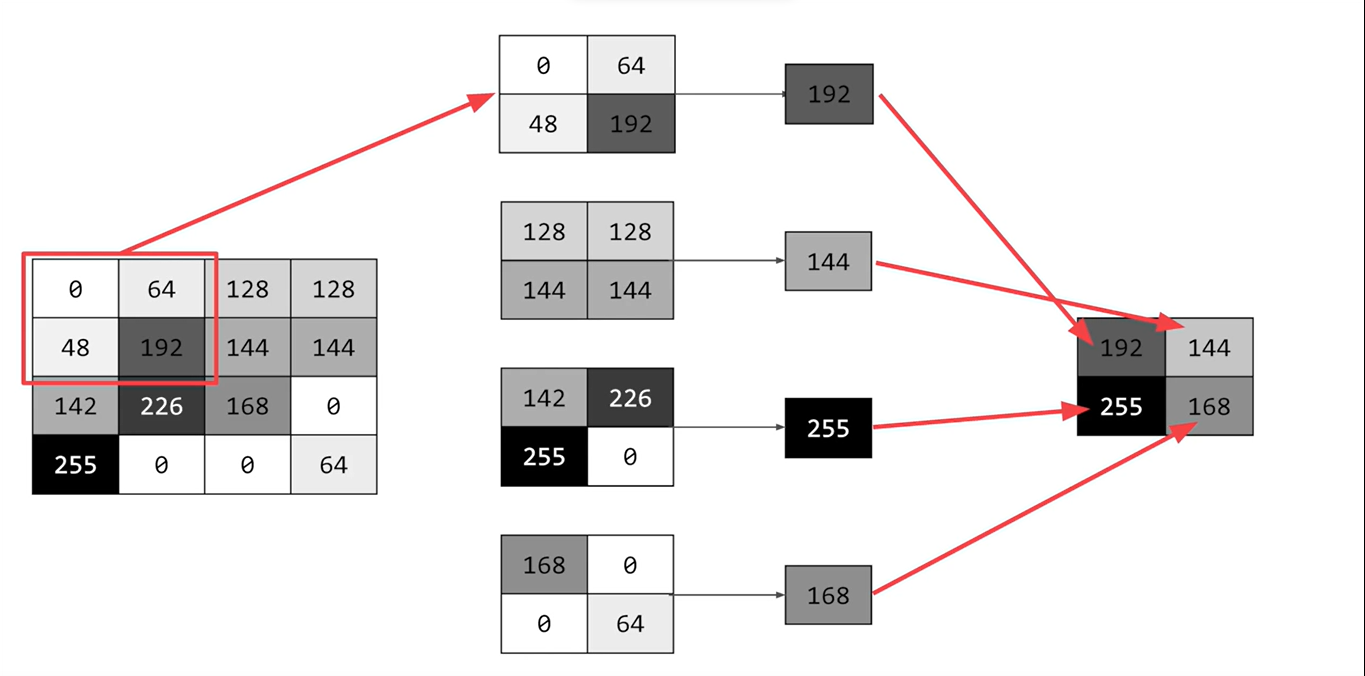

**Contoh Pooling**:
- Di sini, 16 piksel di sebelah kiri diubah menjadi 4 piksel di sebelah kanan dengan melihatnya dalam grid 2 x 2 dan memilih nilai terbesar. 

Ini akan mempertahankan fitur-fitur yang disorot oleh konvolusi sambil secara bersamaan mengurangi ukuran gambar menjadi seperempatnya.

## Kesimpulan

Dengan menggunakan konvolusi dan pooling, kita dapat meningkatkan pemrosesan gambar dan membuat jaringan saraf lebih efisien dalam mengenali fitur-fitur penting.


## Memahami Konvolusi dan Pooling dalam Kode

Sekarang, mari kita lihat konvolusi dan pooling dalam kode. Kita tidak perlu melakukan semua perhitungan untuk penyaringan dan kompresi. Kita cukup mendefinisikan lapisan konvolusi dan pooling untuk melakukan pekerjaan itu. Berikut adalah kode dari contoh sebelumnya, di mana kita mendefinisikan sebuah jaringan saraf dengan:

- **Lapisan input** dalam bentuk data kita,
- **Lapisan output** dalam bentuk jumlah kategori yang ingin kita definisikan,
- **Lapisan tersembunyi** di tengah.

Lapisan **flatten** mengubah gambar kotak 28 x 28 kita menjadi array satu dimensi. Untuk menambahkan konvolusi ke dalam ini, Anda dapat menggunakan kode seperti ini. Anda akan melihat bahwa tiga baris terakhir adalah sama: 

- **flatten**, 
- **lapisan tersembunyi padat** dengan 128 neuron, 
- **lapisan output padat** dengan 10 neuron.

Yang berbeda adalah apa yang telah ditambahkan di atas ini. Mari kita lihat ini baris demi baris.

### Spesifikasi Konvolusi Pertama

Di sini kita sedang menentukan konvolusi pertama. Kita meminta Keras untuk menghasilkan 64 filter untuk kita. Filter ini berukuran tiga x tiga. Aktivasi mereka adalah **relu**, yang berarti bahwa nilai negatif akan dibuang. Akhirnya, bentuk input tetap seperti sebelumnya, yaitu 28 x 28. Angka tambahan satu hanya berarti bahwa kita memberi tahu bahwa kita menggunakan satu byte untuk kedalaman warna. Seperti yang kita lihat sebelumnya, gambar kita adalah skala abu-abu, jadi kita hanya menggunakan satu byte.

Sekarang, tentu saja, Anda mungkin bertanya-tanya tentang 64 filter itu. Ini sedikit di luar lingkup kelas ini untuk mendefinisikannya, tetapi mereka tidak acak. Mereka dimulai dengan seperangkat filter yang sudah dikenal baik dengan cara yang mirip dengan pencocokan pola yang Anda lihat sebelumnya, dan filter yang bekerja dari set tersebut akan dipelajari seiring waktu. 

Untuk informasi lebih lanjut tentang konvolusi dan cara kerjanya, ada sekumpulan sumber daya yang sangat baik di sini.

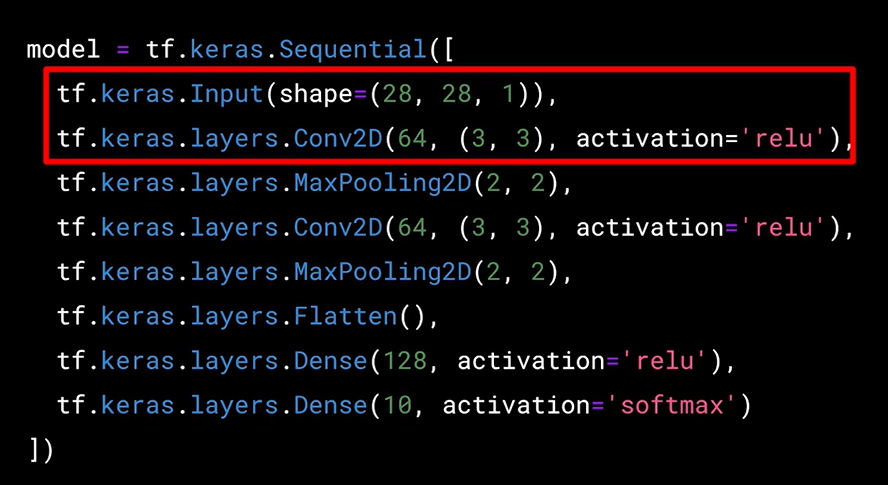


## Menjelajahi Konvolusi dan Pooling dalam Kode

Di video sebelumnya, Anda melihat tentang konvolusi dan mendapatkan gambaran tentang bagaimana mereka bekerja. Dengan melewatkan filter di atas gambar untuk mengurangi jumlah informasi, mereka memungkinkan jaringan saraf untuk secara efektif mengekstrak fitur yang dapat membedakan satu kelas gambar dari yang lain. Anda juga melihat bagaimana pooling mengompres informasi agar lebih mudah dikelola. Ini adalah cara yang sangat baik untuk meningkatkan kinerja pengenalan gambar kita. Mari kita lihat ini dalam aksi menggunakan notebook.

### Kode Jaringan Saraf

Ini adalah jaringan saraf yang sama yang Anda gunakan sebelumnya untuk memuat set gambar pakaian dan kemudian mengklasifikasikannya. Pada akhir epoch kelima, Anda dapat melihat bahwa loss sekitar 0,29, yang berarti akurasi Anda cukup baik pada data pelatihan. Proses pelatihan hanya memerlukan beberapa detik, jadi itu tidak buruk. Dengan data uji seperti sebelumnya dan seperti yang diharapkan, loss sedikit lebih tinggi dan dengan demikian akurasi sedikit lebih rendah.

### Menambahkan Konvolusi dan Pooling

Sekarang Anda dapat melihat kode yang menambahkan konvolusi dan pooling. Kami akan melakukan dua lapisan konvolusi, masing-masing dengan 64 konvolusi dan masing-masing diikuti oleh lapisan max pooling. Anda dapat melihat bahwa kami mendefinisikan konvolusi kami sebagai 3 x 3 dan pool kami sebagai 2 x 2. Mari kita latih. Hal pertama yang akan Anda perhatikan adalah bahwa pelatihan lebih lambat. Untuk setiap gambar, 64 konvolusi telah dicoba, kemudian gambar tersebut dikompres, dan kemudian 64 konvolusi lainnya, lalu dikompres lagi, dan kemudian diteruskan melalui DNN. Ini terjadi untuk 60.000 gambar di setiap epoch. Setelah selesai, Anda dapat melihat bahwa loss sedikit meningkat. Dalam hal ini, ini membawa akurasi kita sedikit lebih tinggi untuk data uji dan data pelatihan kita. Itu cukup keren, bukan?

### Visualisasi Perjalanan Gambar

Sekarang mari kita lihat kode di bagian bawah notebook. Ini adalah visualisasi yang sangat menyenangkan dari perjalanan sebuah gambar melalui konvolusi. Pertama, saya akan mencetak seratus label uji pertama. Angka sembilan, seperti yang kita lihat sebelumnya, adalah sepatu atau bot. Saya telah memilih beberapa contoh di mana label ke-0, ke-23, dan ke-28 semuanya adalah sembilan. Mari kita lihat perjalanan mereka. API Keras memberi kita setiap konvolusi dan setiap pooling, dan setiap dense, dll, sebagai lapisan. Jadi, dengan API lapisan, saya bisa melihat keluaran setiap lapisan. Saya akan membuat daftar keluaran setiap lapisan. Saya kemudian bisa memperlakukan setiap item di lapisan sebagai model aktivasi individu jika saya ingin melihat hasil dari hanya lapisan itu. 

Dengan mengulangi melalui lapisan-lapisan tersebut, saya dapat menampilkan perjalanan gambar melalui konvolusi pertama, kemudian pooling pertama, kemudian konvolusi kedua, dan kemudian pooling kedua. Perhatikan bagaimana ukuran gambar berubah dengan melihat sumbu. Jika saya mengatur nomor konvolusi ke satu, kita dapat melihat bahwa ia hampir segera mendeteksi area tali sepatu sebagai fitur umum antara sepatu. Jadi, misalnya, jika saya mengubah gambar ketiga menjadi tas tangan, Anda akan melihat bahwa area untuk tali sepatu tidak muncul. Jadi konvolusi ini pasti membantu saya memisahkan sepatu dari tas tangan. Dan lagi, jika saya mengatur ke dua, tampaknya itu adalah celana. Tetapi fitur yang mendeteksi sesuatu yang dimiliki sepatu gagal. Untuk melihat kesamaan dalam gambar yang berbeda, coba gambar dua, tiga, dan lima. Semua ini tampaknya adalah celana. Konvolusi dua dan empat tampaknya mendeteksi fitur vertikal ini sebagai sesuatu yang mereka semua miliki bersama. 

Jika saya kembali ke daftar dan menemukan tiga label yang sama, dalam hal ini enam, saya dapat melihat apa yang mereka maksud ketika saya menjalankannya. Saya dapat melihat bahwa mereka tampaknya adalah kemeja. Mari kita coba konvolusi satu. Saya tidak tahu tentang Anda, tetapi saya bisa bermain dengan ini sepanjang hari. Sekarang lihat apa yang Anda lakukan ketika Anda menjalankannya sendiri. Ketika Anda selesai bermain, coba ubah kode dengan saran-saran ini, mengedit konvolusi, menghapus konvolusi terakhir, dan menambahkan lebih banyak, dan sebagainya. Juga, dalam latihan sebelumnya, Anda menambahkan callback yang menyelesaikan pelatihan setelah loss mencapai jumlah tertentu. Jadi coba tambahkan itu di sini. Ketika Anda selesai, kita akan beralih ke tahap berikutnya, yaitu menangani gambar yang lebih besar dan lebih kompleks daripada yang ini. Untuk melihat bagaimana konvolusi dapat mendeteksi fitur ketika mereka tidak selalu berada di tempat yang sama seperti yang terjadi pada gambar 28 x 28 yang terkontrol dengan ketat ini.
